In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [11]:
brm_hourly_driven = pd.read_csv("../generated/brm_hourly_driven.csv")
frb_hourly_driven = pd.read_csv("../generated/frb_hourly_driven.csv")

brm_hourly_weather = pd.read_csv("../generated/brm_hourly_weather.csv")
frb_hourly_weather = pd.read_csv("../generated/frb_hourly_weather.csv")

## Prediction

In [18]:
def merge_duration_and_weather(duration, weather):
    return duration.merge(how="left", left_on=["day", "hour"], right_on=["day","hour"], right=weather)

def timedelta_to_hours(timedelta_array):
    return timedelta_array.map(lambda x: x / pd.Timedelta("1 hour"))

def add_weekday(frame):
    frame["day"] = pd.to_datetime(frame["day"])
    frame["weekday"] = frame["day"].map(lambda x: x.weekday())
    return frame
    
def split_weekday(frame):
    frame = add_weekday(frame)
    weekdays = [None]*7
    for i in range(0,6):
        weekdays[i] = frame[frame["weekday"]==i]
    return weekdays

def regression(frame,frame_model):
    y = frame["trip_duration"]
    X = frame[["temperature","precipitation"]]
    frame_model.fit(X, y)
    predict = brm_model.predict(X)
    return predict

def plot_regression(X,y):
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, marker="x")
    plt.xlabel("temperature in °C")
    plt.ylabel("trip duration in h")
    plt.plot(X, predict, c='C2')
    plt.legend(['Squared loss fit','Observed hours'])
    
def train_test_split(frame,prediction_value):
    x_train, x_test, x_validation, y_train, y_test = train_test_split(df["High_temp"], df["MAX"], test_size=0.3,random_state=42)

In [19]:
frb_hourly = merge_duration_and_weather(frb_hourly_driven, frb_hourly_weather)
frb_hourly["trip_duration"] = timedelta_to_hours(frb_hourly["trip_duration"])

brm_hourly = merge_duration_and_weather(brm_hourly_driven, brm_hourly_weather)
brm_hourly["trip_duration"] = timedelta_to_hours(brm_hourly["trip_duration"])

frb_weekdays = split_weekday(frb_hourly)
brm_weekdays = split_weekday(brm_hourly)

In [20]:
x = frb_weekdays[0]["trip_duration"]
y = frb_weekdays[0]["temperature"]
z = frb_weekdays[0]["precipitation"]

Example plot for mondays

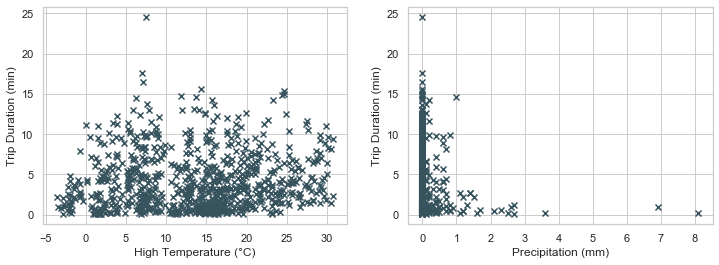

In [21]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(y,x, marker='x')
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Trip Duration (min)")
bx =  fig.add_subplot(1,2,2)
bx.scatter(z,x, marker='x')
bx.set_xlabel("Precipitation (mm)")
bx.set_ylabel("Trip Duration (min)")
plt.show()

###  Linear regression

Split the data set into traing(60%), validation(20%), test(20%) setst to prevent leakage.

In [8]:
x_train, x_validate, x_test = np.split(brm_hourly_weather_demand_8['temperature'].sample(frac=1), [int(.6*len(brm_hourly_weather_demand_8['temperature'])), int(.8*len(brm_hourly_weather_demand_8['temperature']))])
y_train, y_validate, y_test = np.split(brm_hourly_weather_demand_8['trip_duration'].sample(frac=1), [int(.6*len(brm_hourly_weather_demand_8['trip_duration'])), int(.8*len(brm_hourly_weather_demand_8['trip_duration']))])

NameError: name 'brm_hourly_weather_demand_8' is not defined

We will use all the red data points to create our linear model, which will then be tested and "fine tuned" on the blue data set.
Finally we use the green values to evaluate the performance of our model.

In [9]:
plt.scatter(x_train, y_train, label = "Training Data", color = "r", alpha =.7)
plt.scatter(x_test, y_test, label = "Test Data", color = "b", alpha =.7)
plt.scatter(x_validate, y_validate, label = "Validation Data", color = "g", alpha =.7)
plt.legend()
plt.title("Train_Test_Validate Split")
plt.show()

NameError: name 'x_train' is not defined

In [ ]:
#Create linear model and train it 
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1, 1), y_train.values)

In [ ]:
# Use model to predict on test data
prediction = lr.predict(x_test.values.reshape(-1, 1))

# Plot prediction line against actual test data 
plt.plot(x_test, prediction, label='Linear Regression', color = 'r')
plt.scatter(x_test, y_test, label='Actual test data', color = 'b', alpha=.7)
plt.legend()
plt.show()

The best score that we could achieve for a model is 1.0. 
~Soo our linear model is not that great...

In [ ]:
# Plot prediction line against actual test data 
prediction = lr.predict(x_validate.values.reshape(-1, 1))
plt.plot(x_validate, prediction, label='Linear Regression', color = 'r')
plt.scatter(x_validate, y_validate, label='Actual test data', color = 'g', alpha=.7)
plt.legend()
plt.show()

In [ ]:
# Score the model 
lr.score(x_validate.values.reshape(-1, 1), y_validate.values)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_true = y_validate
y_pred = lr.predict(x_validate.values.reshape((-1,1)))

In [ ]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true))
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5)
print("Coefficient of determination:",r2_score(y_pred, y_true))

### Polynomial  regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
def plot_regression_poly(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="o", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (Min)")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    print(lin_reg_Poly.coef_) 

In [ ]:
xp = x_train.values

yp = y_train 

plot_regression_poly(X = xp, Y = yp, d = 4)

In [ ]:
xp = x_test.values

yp = y_test 

plot_regression_poly(X = xp, Y = yp, d = 4)

In [ ]:
xp = x_validate.values

yp = y_validate 

plot_regression_poly(X = xp, Y = yp, d = 4)

In [ ]:
plot_regression_poly

### Idea

Split dataset into train_test_validate sets not for every hour individually but rather hourly.